# Pandas demo

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 18

### pandas provides 1D Series, 2D DataFrame

(For higher-dimensionality use a "multi-index")

In [5]:
t = np.arange(0.0, 1.0, 0.1)
s = pd.Series(t)

In [6]:
x = t + np.random.normal(scale=0.1, size=t.shape)
y = x**2 + np.random.normal(scale=0.5, size=t.shape)
df1 = pd.DataFrame({'x': x, 'y': y})

### All pandas objects are indexed

In [7]:
s

0    0.0
1    0.1
2    0.2
3    0.3
4    0.4
5    0.5
6    0.6
7    0.7
8    0.8
9    0.9
dtype: float64

In [8]:
df1

,x,y
0,0.116489,0.381960
1,0.117793,0.391471
2,0.203200,0.171552
3,0.210729,0.525363
4,0.628063,0.377105
5,0.431021,0.429239
6,0.913207,0.628059
7,0.460146,0.072482
8,0.781348,0.864292
9,0.924884,1.369664


### Sometimes it makes sense to use another variable as the index

In [9]:
df1 = pd.DataFrame({'x': x, 'y': y}, index=t)
df1

,x,y
0.0,0.116489,0.381960
0.1,0.117793,0.391471
0.2,0.203200,0.171552
0.3,0.210729,0.525363
0.4,0.628063,0.377105
0.5,0.431021,0.429239
0.6,0.913207,0.628059
0.7,0.460146,0.072482
0.8,0.781348,0.864292
0.9,0.924884,1.369664


In [10]:
df1 = df1.rename_axis('t')
df1

,x,y
t,,
0.0,0.116489,0.381960
0.1,0.117793,0.391471
0.2,0.203200,0.171552
0.3,0.210729,0.525363
0.4,0.628063,0.377105
0.5,0.431021,0.429239
0.6,0.913207,0.628059
0.7,0.460146,0.072482
0.8,0.781348,0.864292


In [11]:
df1 = df1.rename_axis('vars', axis='columns')
df1

vars,x,y
t,,
0.0,0.116489,0.381960
0.1,0.117793,0.391471
0.2,0.203200,0.171552
0.3,0.210729,0.525363
0.4,0.628063,0.377105
0.5,0.431021,0.429239
0.6,0.913207,0.628059
0.7,0.460146,0.072482
0.8,0.781348,0.864292


In [12]:
df1 = pd.DataFrame({'t': t, 'x': x, 'y': y})
df1 = df1.set_index('t')
df1 = df1.rename_axis('vars', axis='columns')
df1

vars,x,y
t,,
0.0,0.116489,0.381960
0.1,0.117793,0.391471
0.2,0.203200,0.171552
0.3,0.210729,0.525363
0.4,0.628063,0.377105
0.5,0.431021,0.429239
0.6,0.913207,0.628059
0.7,0.460146,0.072482
0.8,0.781348,0.864292


Note that most operations on a DataFrame return a new DataFrame, rather than changing the existing one.

This is generally done in a clever way, so it is still efficient.

If you want to make a change to the original, you can use the argument ```inplace=True```.

### Sorting

In [13]:
df1.sort_values('y')

vars,x,y
t,,
0.7,0.460146,0.072482
0.2,0.203200,0.171552
0.4,0.628063,0.377105
0.0,0.116489,0.381960
0.1,0.117793,0.391471
0.5,0.431021,0.429239
0.3,0.210729,0.525363
0.6,0.913207,0.628059
0.8,0.781348,0.864292


Use ```.sort_index``` to sort on the index.

### Plot directly from pandas

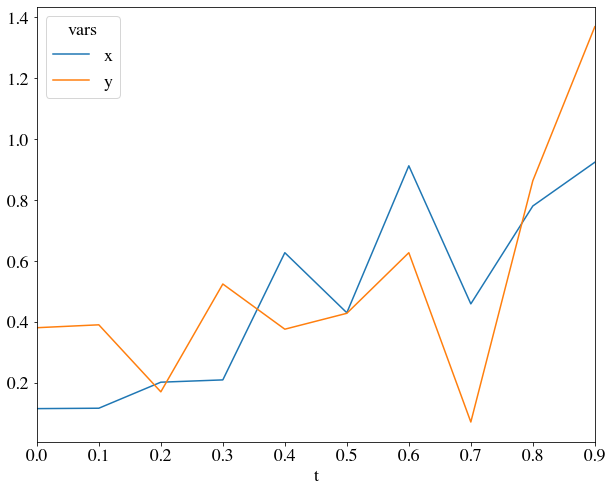

In [14]:
ax = df1.plot()
ax.set_xlabel('t');

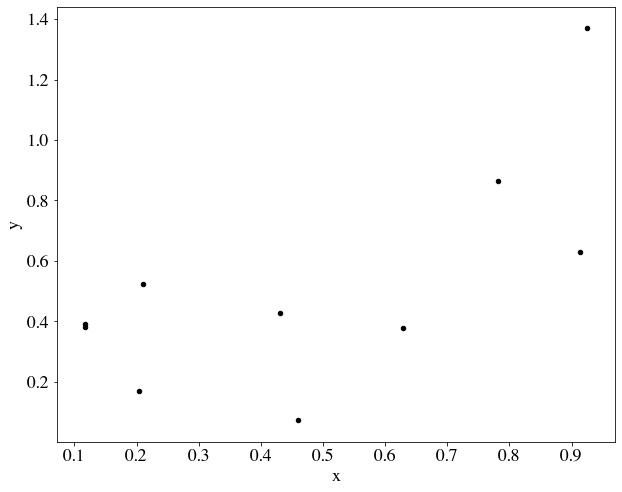

In [15]:
df1.plot('x', 'y', 'scatter');

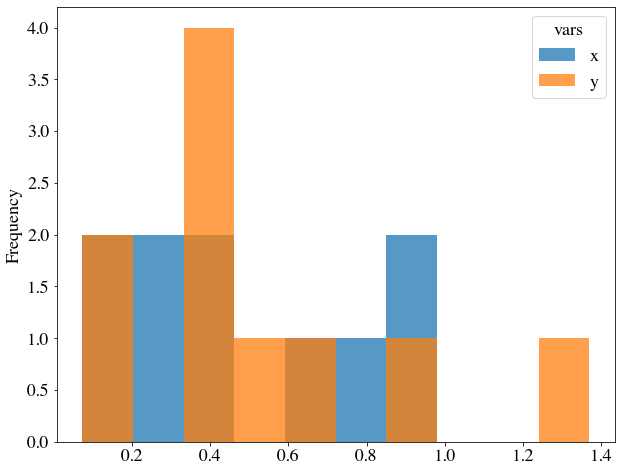

In [16]:
df1.plot(kind='hist', alpha=0.75);

### Accessing data

Get columns by slicing dataframe

In [17]:
df1['x']

t
0.0    0.116489
0.1    0.117793
0.2    0.203200
0.3    0.210729
0.4    0.628063
0.5    0.431021
0.6    0.913207
0.7    0.460146
0.8    0.781348
0.9    0.924884
Name: x, dtype: float64

... or accessing with attribute notation

In [18]:
df1.x

t
0.0    0.116489
0.1    0.117793
0.2    0.203200
0.3    0.210729
0.4    0.628063
0.5    0.431021
0.6    0.913207
0.7    0.460146
0.8    0.781348
0.9    0.924884
Name: x, dtype: float64

Get rows by slicing ```.loc``` using index, or ```.iloc``` using integer position

In [19]:
df1.loc[0.1:0.5]

vars,x,y
t,,
0.1,0.117793,0.391471
0.2,0.203200,0.171552
0.3,0.210729,0.525363
0.4,0.628063,0.377105
0.5,0.431021,0.429239


In [20]:
df1.iloc[1:5]

vars,x,y
t,,
0.1,0.117793,0.391471
0.2,0.203200,0.171552
0.3,0.210729,0.525363
0.4,0.628063,0.377105


### Joining tables uses the index

In [21]:
t2 = t[::2]
z = t2**3 + np.random.normal(scale=1.0, size=t2.shape)

In [22]:
df2 = pd.DataFrame({'z' :z, 'z2': z**2}, index=t2)
df2

,z,z2
0.0,-1.500956,2.252868
0.2,-2.098749,4.404749
0.4,0.034239,0.001172
0.6,0.269285,0.072514
0.8,-0.823831,0.678697


In [23]:
df3 = df1.join(df2)
df3

,x,y,z,z2
t,,,,
0.0,0.116489,0.381960,-1.500956,2.252868
0.1,0.117793,0.391471,NaN,NaN
0.2,0.203200,0.171552,-2.098749,4.404749
0.3,0.210729,0.525363,NaN,NaN
0.4,0.628063,0.377105,0.034239,0.001172
0.5,0.431021,0.429239,NaN,NaN
0.6,0.913207,0.628059,0.269285,0.072514
0.7,0.460146,0.072482,NaN,NaN
0.8,0.781348,0.864292,-0.823831,0.678697


### Pandas handles missing data intelligently

#### Filling NaNs

In [24]:
df3 = df3.fillna(0)
df3

,x,y,z,z2
t,,,,
0.0,0.116489,0.381960,-1.500956,2.252868
0.1,0.117793,0.391471,0.000000,0.000000
0.2,0.203200,0.171552,-2.098749,4.404749
0.3,0.210729,0.525363,0.000000,0.000000
0.4,0.628063,0.377105,0.034239,0.001172
0.5,0.431021,0.429239,0.000000,0.000000
0.6,0.913207,0.628059,0.269285,0.072514
0.7,0.460146,0.072482,0.000000,0.000000
0.8,0.781348,0.864292,-0.823831,0.678697


### Binning data and grouped operations

In [25]:
pd.cut(df3.y, 3)

t
0.0    (0.0712, 0.505]
0.1    (0.0712, 0.505]
0.2    (0.0712, 0.505]
0.3     (0.505, 0.937]
0.4    (0.0712, 0.505]
0.5    (0.0712, 0.505]
0.6     (0.505, 0.937]
0.7    (0.0712, 0.505]
0.8     (0.505, 0.937]
0.9      (0.937, 1.37]
Name: y, dtype: category
Categories (3, interval[float64]): [(0.0712, 0.505] < (0.505, 0.937] < (0.937, 1.37]]

In [26]:
groups = df3.groupby(pd.cut(df3.y, 3, labels=['low', 'medium', 'high']))

In [27]:
groups.mean()

,x,y,z,z2
y,,,,
low,0.326118,0.303968,-0.594244,1.109798
medium,0.635095,0.672571,-0.184849,0.250404
high,0.924884,1.369664,0.000000,0.000000


In [28]:
bins = [-0.75, 0, 0.75, 1.5]
pd.cut(df3.y, bins)

t
0.0    (0.0, 0.75]
0.1    (0.0, 0.75]
0.2    (0.0, 0.75]
0.3    (0.0, 0.75]
0.4    (0.0, 0.75]
0.5    (0.0, 0.75]
0.6    (0.0, 0.75]
0.7    (0.0, 0.75]
0.8    (0.75, 1.5]
0.9    (0.75, 1.5]
Name: y, dtype: category
Categories (3, interval[float64]): [(-0.75, 0.0] < (0.0, 0.75] < (0.75, 1.5]]

In [29]:
groups = df3.groupby(pd.cut(df3.y, bins))

In [30]:
groups.mean()

,x,y,z,z2
y,,,,
"(-0.75, 0.0]",NaN,NaN,NaN,NaN
"(0.0, 0.75]",0.385081,0.372154,-0.412023,0.841413
"(0.75, 1.5]",0.853116,1.116978,-0.411915,0.339348


### Reading and writing data

| Data | Reader | Writer |
| --- | --- | --- |
| CSV | read_csv | to_csv |
| JSON | read_json | to_json |
| HTML | read_html | to_html |
| MS Excel | read_excel | to_excel |
| HDF5 Format | read_hdf | to_hdf |
| Python Pickle Format | read_pickle | to_pickle |
| SQL | read_sql | to_sql |


In [33]:
# write dataframe to CSV file
df3.to_csv('test.csv')

# read CSV file back in
newdf = pd.read_csv('test.csv')

#### Read and write astronomical data formats via AstroPy

In [34]:
from astropy.table import Table

In [35]:
t = Table.from_pandas(df3)
t.write('test.fits')
t.write('test.tex')

In [36]:
t = Table.read('test.fits')
newdf = t.to_pandas()

### Lots more functionality ...

* Timeseries (handling dates and times)
* Applying functions to columns, rows or groups
* Lots of examples on Stack Overflow, etc.
  * Prefer recent answers
  * Look at official documentation